In [3]:
import pandas as pd


In [4]:
df = pd.read_csv("AusApparalSales4thQrt2020.csv")
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [5]:
df.shape

(7560, 6)

In [6]:
df.dtypes

Date     object
Time     object
State    object
Group    object
Unit      int64
Sales     int64
dtype: object

In [7]:
print(df.isna().sum())

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


In [8]:
df["Date"] = pd.to_datetime(df["Date"])

In [9]:
df[df["Unit"] < 0]

,Date,Time,State,Group,Unit,Sales


In [10]:
df[df["Sales"] < 0]

,Date,Time,State,Group,Unit,Sales


###  Choose a suitable data wrangling technique—either data standardization or normalization.
Execute the preferred normalization method and
present the resulting data. (Normalization is the preferred approach for this
problem.

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols_to_normalize = ["Sales","Unit"]
df_new = df.copy()
df_new[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

In [12]:
print(df_new.head())

        Date        Time State     Group      Unit     Sales
0 2020-10-01     Morning    WA      Kids  0.095238  0.095238
1 2020-10-01     Morning    WA       Men  0.095238  0.095238
2 2020-10-01     Morning    WA     Women  0.031746  0.031746
3 2020-10-01     Morning    WA   Seniors  0.206349  0.206349
4 2020-10-01   Afternoon    WA      Kids  0.015873  0.015873


In [13]:
df_second = pd.DataFrame(df_new)
df_second.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,0.095238,0.095238
1,2020-10-01,Morning,WA,Men,0.095238,0.095238
2,2020-10-01,Morning,WA,Women,0.031746,0.031746
3,2020-10-01,Morning,WA,Seniors,0.206349,0.206349
4,2020-10-01,Afternoon,WA,Kids,0.015873,0.015873


## Data Wrangling – GroupBy Insights


In [14]:
# Group by State and sum Sales
state_sales = df.groupby("State")["Sales"].sum().sort_values(ascending=True)
state_sales 

State
WA      22152500
NT      22580000
TAS     22760000
QLD     33417500
SA      58857500
NSW     74970000
VIC    105565000
Name: Sales, dtype: int64

In [15]:
# Group by Group and sum Sales
group_sales = df.groupby("Group")["Sales"].sum().sort_values(ascending=False)
group_sales

Group
Men        85750000
Women      85442500
Kids       85072500
Seniors    84037500
Name: Sales, dtype: int64

In [16]:
# Group by State and Group
groupby_state_group = df.groupby(["State","Group"])["Sales"].sum().reset_index()
groupby_state_group 

,State,Group,Sales
0,NSW,Kids,18587500
1,NSW,Men,19022500
2,NSW,Seniors,18187500
3,NSW,Women,19172500
4,NT,Kids,5700000
5,NT,Men,5762500
6,NT,Seniors,5465000
7,NT,Women,5652500
8,QLD,Kids,8510000
9,QLD,Men,8392500


## Data Analysis – Step 2: Descriptive Statistics

In [17]:
import numpy as np
from scipy import stats

In [18]:
df["Sales"].mean()

45013.5582010582

In [19]:
df["Sales"].median()

35000.0

In [20]:
df["Sales"].mode().values[0]

22500

In [21]:
df["Sales"].std()

32253.506943966317

In [22]:
# For UNIT

In [23]:
df["Unit"].mean()

18.00542328042328

In [24]:
df["Unit"].median()

14.0

In [25]:
df["Unit"].mode().values[0]

9

In [26]:
df["Unit"].std()

12.901402777586458

### Data Analysis – Groups with Highest and Lowest Sales

In [27]:
group_sales = df.groupby("Group")["Sales"].sum().sort_values(ascending=False)
group_sales

Group
Men        85750000
Women      85442500
Kids       85072500
Seniors    84037500
Name: Sales, dtype: int64

In [28]:
# Highest and lowest

In [29]:
highest_group = group_sales.idxmax()
lowest_group = group_sales.idxmin()

In [30]:
print( highest_group)
print( lowest_group)

 Men
 Seniors


### Data Analysis –  Time-based Sales Reports

In [32]:
df_time = df.set_index("Date")

In [33]:
# Weekly Sales
weekly_sales = df_time.resample("W")["Sales"].sum()
weekly_sales

Date
2020-10-04    15045000
2020-10-11    27002500
2020-10-18    26640000
2020-10-25    26815000
2020-11-01    21807500
2020-11-08    20865000
2020-11-15    21172500
2020-11-22    21112500
2020-11-29    21477500
2020-12-06    29622500
2020-12-13    31525000
2020-12-20    31655000
2020-12-27    31770000
2021-01-03    13792500
Freq: W-SUN, Name: Sales, dtype: int64

In [35]:
monthly_sales = df_time.resample("ME")["Sales"].sum()
monthly_sales

Date
2020-10-31    114290000
2020-11-30     90682500
2020-12-31    135330000
Freq: ME, Name: Sales, dtype: int64

In [37]:
quarterly_sales = df_time.resample("QE")["Sales"].sum()
quarterly_sales

Date
2020-12-31    340302500
Freq: QE-DEC, Name: Sales, dtype: int64

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
sns.set_theme(style='whitegrid')

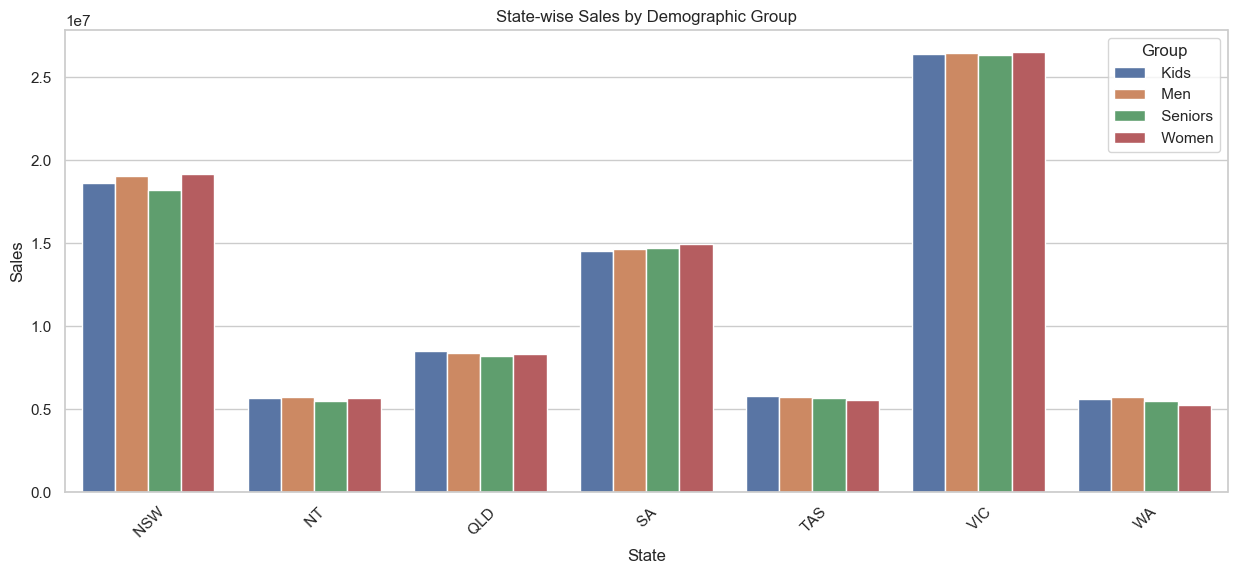

In [42]:
groupby_state_group = df.groupby(["State","Group"])["Sales"].sum().reset_index()

plt.figure(figsize=(15,6))
sns.barplot(
    x = "State",
    y = "Sales",
    hue = "Group",
    data = groupby_state_group)

plt.title("State-wise Sales by Demographic Group")
plt.xticks(rotation=45)
plt.show()


### Group-wise Sales Analysis Across Various States

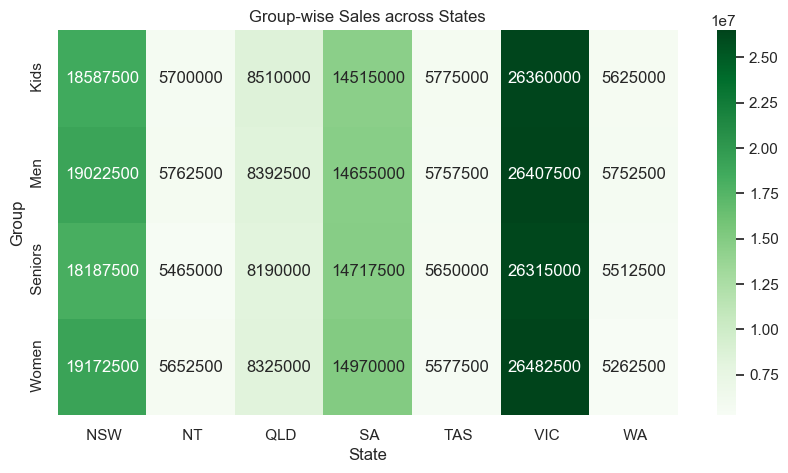

In [48]:
# Pivot for heatmap
pivot_table = groupby_state_group.pivot(
    index="Group",
    columns="State",
    values="Sales"
)

plt.figure(figsize=(10,5))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="Greens")
plt.title("Group-wise Sales across States")
plt.show()


### Time-of-Day Analysis

C:\Users\bazil\AppData\Local\Temp\ipykernel_14524\1452531501.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Time", data=df, order=df["Time"].value_counts().index, palette="coolwarm")


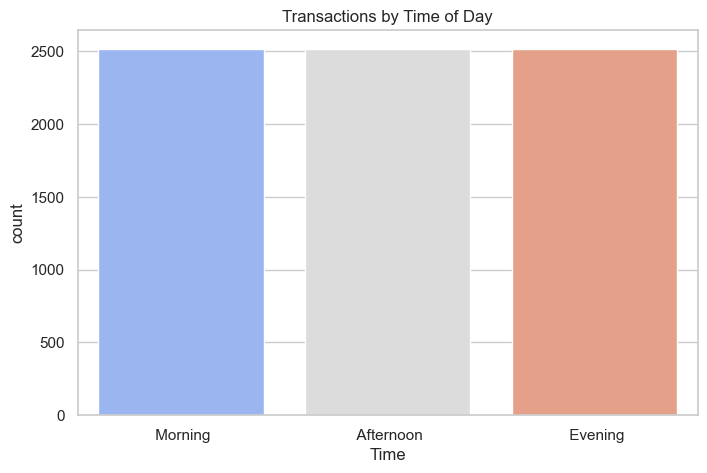

C:\Users\bazil\AppData\Local\Temp\ipykernel_14524\1452531501.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Time", y="Sales", data=time_sales, palette="viridis")


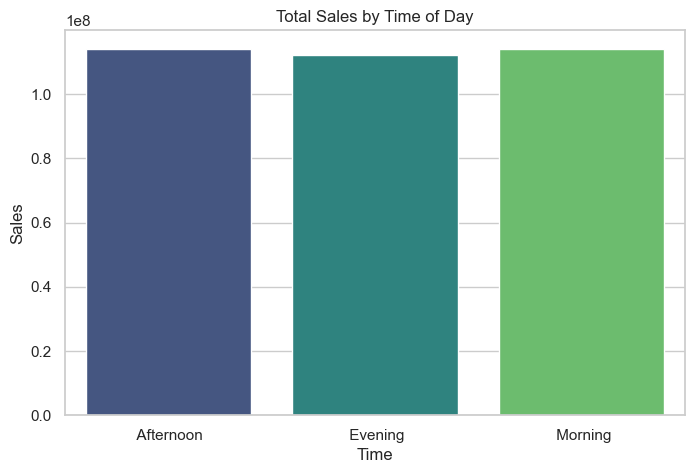

In [49]:
# Count of transactions per time of day
plt.figure(figsize=(8,5))
sns.countplot(x="Time", data=df, order=df["Time"].value_counts().index, palette="coolwarm")
plt.title("Transactions by Time of Day")
plt.show()

# Optional: Aggregate Sales by Time of Day
time_sales = df.groupby("Time")["Sales"].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x="Time", y="Sales", data=time_sales, palette="viridis")
plt.title("Total Sales by Time of Day")
plt.show()

###  Time-Series Analysis: Daily, Weekly, Monthly, Quarterly

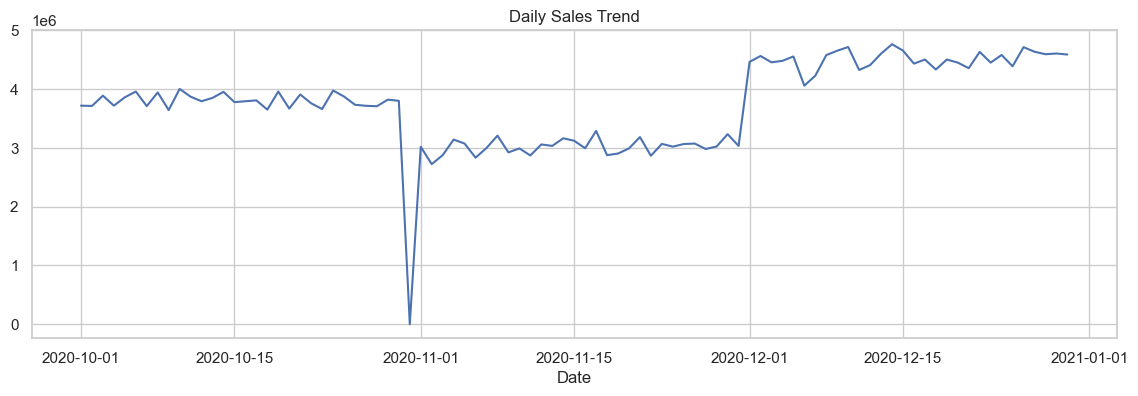

In [60]:
daily_sales = df_time["Sales"].resample("D").sum()

plt.figure(figsize=(14,4))
sns.lineplot(x=daily_sales.index, y=daily_sales.values)
plt.title("Daily Sales Trend")
plt.show()

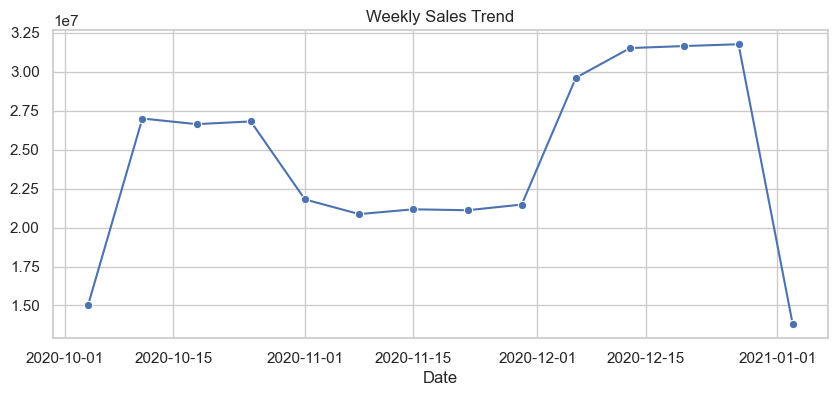

In [59]:
weekly_sales = df_time['Sales'].resample("W").sum()
plt.figure(figsize=(10,4))
sns.lineplot(x=weekly_sales.index, y=weekly_sales.values, marker="o")
plt.title("Weekly Sales Trend")
plt.show()


C:\Users\bazil\AppData\Local\Temp\ipykernel_14524\3122927069.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df_time["Sales"].resample("M").sum()
C:\Users\bazil\AppData\Local\Temp\ipykernel_14524\3122927069.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette="crest")


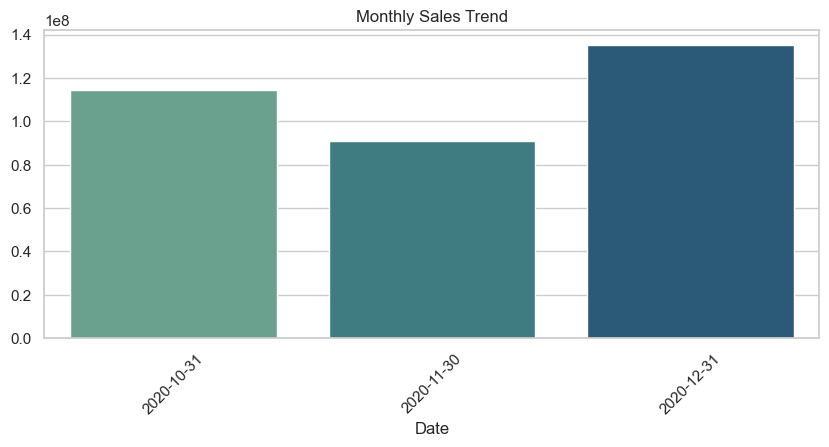

In [52]:
# Monthly
monthly_sales = df_time["Sales"].resample("M").sum()

plt.figure(figsize=(10,4))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette="crest")
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.show()


C:\Users\bazil\AppData\Local\Temp\ipykernel_14524\3456421474.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_sales = df_time["Sales"].resample("Q").sum()
C:\Users\bazil\AppData\Local\Temp\ipykernel_14524\3456421474.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=quarterly_sales.index, y=quarterly_sales.values, palette="rocket")


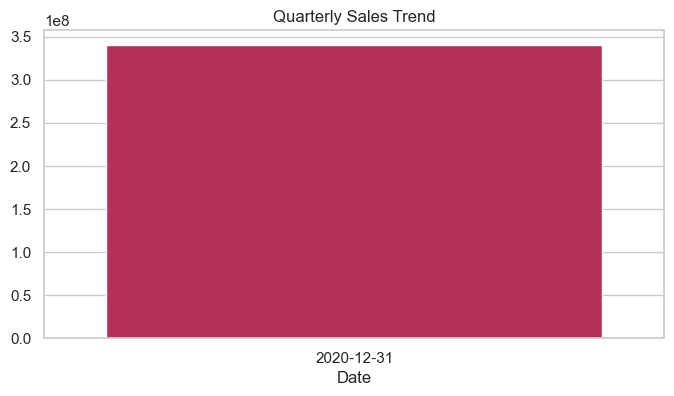

In [54]:
# Quarterly
quarterly_sales = df_time["Sales"].resample("Q").sum()

plt.figure(figsize=(8,4))
sns.barplot(x=quarterly_sales.index, y=quarterly_sales.values, palette="rocket")
plt.title("Quarterly Sales Trend")
plt.show()


###  Box Plot for Sales and Unit

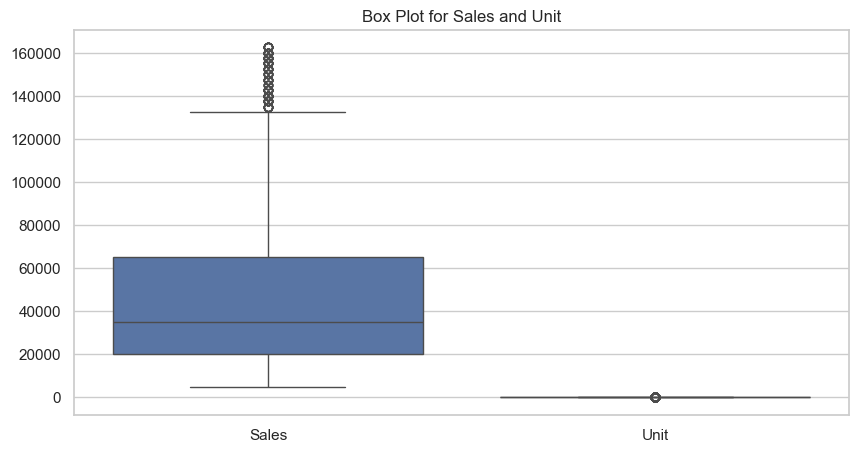

In [55]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[["Sales", "Unit"]])
plt.title("Box Plot for Sales and Unit")
plt.show()


### Distribution Plot for Sales

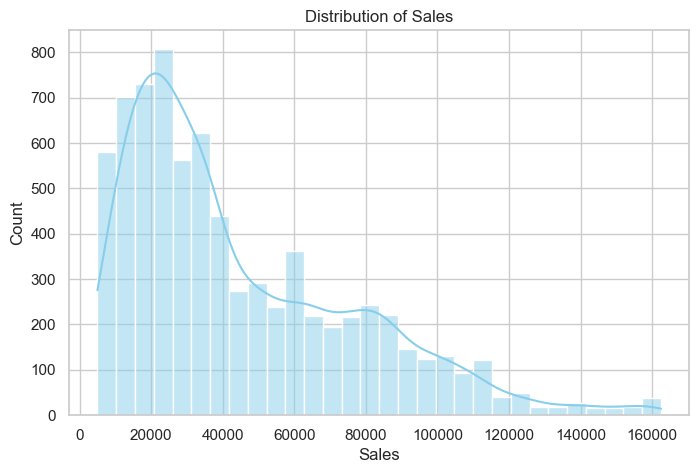

In [56]:
plt.figure(figsize=(8,5))
sns.histplot(df["Sales"], kde=True,color='skyblue', bins=30)
plt.title("Distribution of Sales")
plt.show()